Epoch 1/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 102.1309 - val_loss: 0.5089
Epoch 2/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 4.3998 - val_loss: 0.4728
Epoch 3/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.5218 - val_loss: 0.6017
Epoch 4/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 6.3920 - val_loss: 0.2366
Epoch 5/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 1.9280 - val_loss: 0.2927
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
0.7752244165186498
Number of Anomalies: 2849


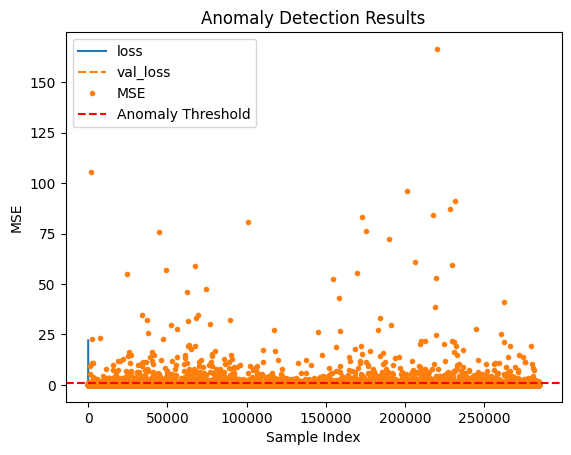

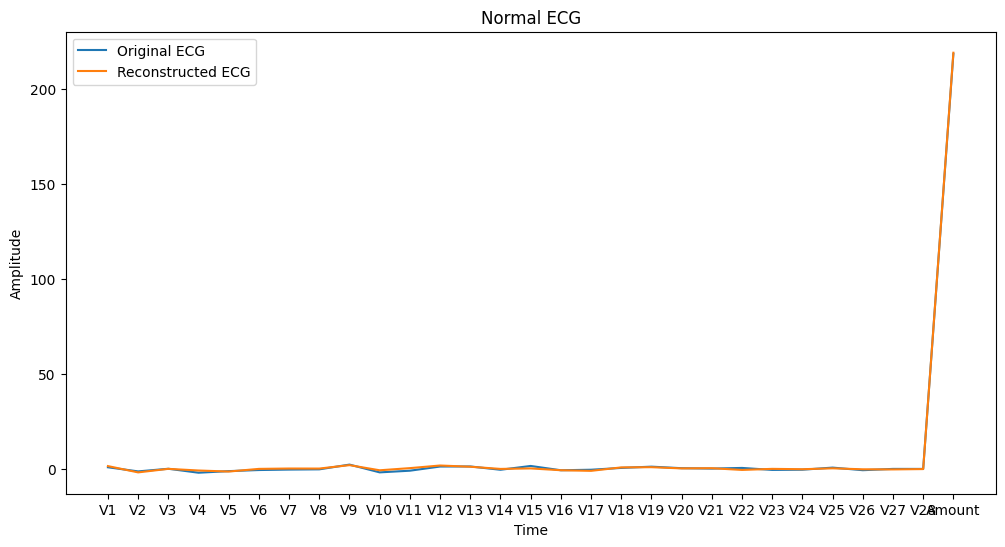

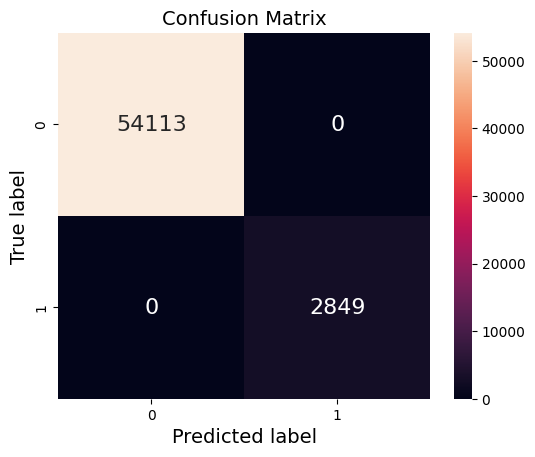

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

path = "E:\Deep Learning Datasets-20241106T032755Z-001\Deep Learning Datasets\9 Credit Card Dataset\creditcard.csv"
df = pd.read_csv(path)

df = df.drop(['Time','Class'], axis=1)
df

# Preprocess the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.2)

from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models

encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(20, activation='relu')
])

decoder = tf.keras.models.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')  # Use linear activation for reconstruction
])

model = tf.keras.models.Sequential([
    encoder,
    decoder
])

model.compile(optimizer='adam', loss ='mean_squared_error')

history = model.fit(
    x_train,
    x_train,
    validation_data=(x_test,x_test),
    epochs=5,
    batch_size = 100,
    shuffle=True
)

import seaborn as sns
sns.lineplot(model.history.history)

predictions = model.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
print(threshold)
anomalies = mse > threshold

# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

#Plot the anomalies
import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE', )
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x_test.iloc[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')

plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()